<a href="https://colab.research.google.com/github/UMANG13-coder/CE154_ML/blob/main/Lab_9/Lab_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, centers=3, n_features=2,
cluster_std=0.2, random_state=0)
X

array([[ 2.17058568,  0.85600391],
       [ 0.79717677,  4.38116783],
       [ 2.24471791,  0.86666164],
       [ 0.65349051,  4.26123927],
       [ 0.76655949,  4.01978374],
       [ 0.90668765,  4.33505712],
       [-1.75639774,  2.83031825],
       [-1.33701985,  2.93539251],
       [ 2.18972647,  0.97915603],
       [ 0.84940566,  4.23123909],
       [ 1.12208819,  4.32958391],
       [ 1.22232821,  4.5442633 ],
       [ 2.14840001,  0.59041492],
       [ 1.28282592,  4.59765908],
       [-1.67585498,  2.75259455],
       [ 2.42877931,  1.07887259],
       [-1.54659452,  2.7851866 ],
       [ 0.81364082,  3.95853081],
       [-1.54055233,  3.26055081],
       [-1.74778068,  2.92831528],
       [-1.65562769,  2.47320163],
       [-1.53476058,  2.68426356],
       [-1.39887771,  2.59449105],
       [ 0.79871293,  3.90762803],
       [ 1.841117  ,  1.10855401],
       [ 2.08064994,  0.97806153],
       [ 1.90128431,  1.0055135 ],
       [ 1.82223755,  1.07782896],
       [-1.60074038,

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=3).fit(X)

In [ ]:
kmean.cluster_centers_

array([[ 0.95164831,  4.28882085],
       [ 2.0720792 ,  0.98848385],
       [-1.538563  ,  2.91165191]])

In [ ]:
kmean.labels_

array([1, 0, 1, 0, 0, 0, 2, 2, 1, 0, 0, 0, 1, 0, 2, 1, 2, 0, 2, 2, 2, 2,
       2, 0, 1, 1, 1, 1, 2, 2, 0, 1, 1, 0, 2, 2, 0, 1, 1, 2, 2, 1, 1, 0,
       0, 0, 1, 1, 2, 2, 2, 1, 0, 1, 2, 2, 1, 1, 0, 1, 1, 2, 2, 2, 2, 1,
       0, 2, 1, 0, 2, 0, 0, 1, 1, 0, 0, 0, 2, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 2, 2, 2, 2, 0, 0, 2, 2], dtype=int32)

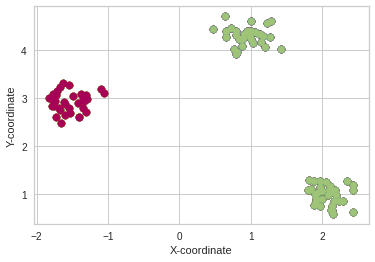

In [ ]:
for i in y:
  plt.scatter(X[y==i ,0],X[y==i ,1], label=i)
plt.xlabel("X-coordinate")
plt.ylabel("Y-coordinate")
plt.show()

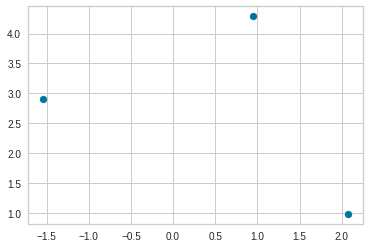

In [ ]:
plt.scatter(kmean.cluster_centers_[:,0],kmean.cluster_centers_[:,1])
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
ans = silhouette_score(X,y)
ans

0.8816040239688525

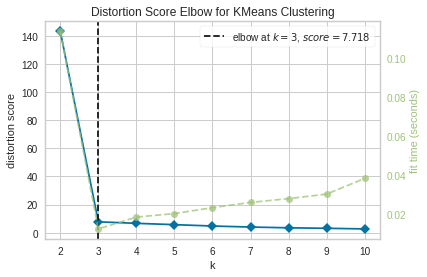

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

new_kmean = KMeans()
visualizer = KElbowVisualizer(new_kmean)

visualizer.fit(X)
visualizer.show()

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:1146: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


array([1], dtype=int32)

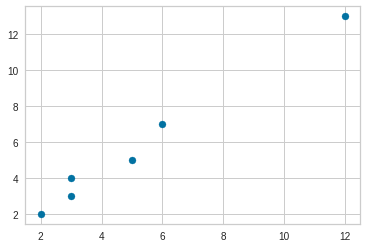

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
#x = np.array([5,7,8,7,2,17,2,9,4,11,12,9,6])
X1 = np.array([[2,2],[3,4],[6,7],[5,5],[3,3],[12,13]])
#X1.shape()
X2 = np.array([2,3,4])
plt.scatter(X1[:,0], X1[:,1])
centroid = np.array([[2,2],[3,4],[6,7]])
kmeans = KMeans(n_clusters=3, init=centroid).fit(X1)
kmeans.cluster_centers_
kmeans.labels_
#print("Number of iterations " , kmeans.n_iter_)
kmeans.predict([[8,8]])

### *Hand Written Digit Recognition*

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
#digits dataset from scikit learn consists of 8x8 pixel images of digits
#Data plotting and visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
digits = load_digits()

In [ ]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [ ]:
from sklearn.cluster import KMeans

model = KMeans()
model.fit(digits.data)
digits.data.shape

(1797, 64)

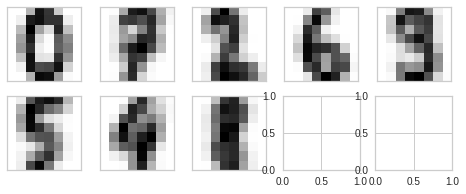

In [ ]:
fig, ax = plt.subplots(2, 5, figsize = (8,3)) 
centers = model.cluster_centers_.reshape(8,8,8)
for axi, center in zip(ax.flat, centers):
  axi.set(xticks = [], yticks = [])
  axi.imshow(center, interpolation='nearest',cmap = plt.cm.binary)

In [ ]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
labels = np.zeros_like(model.cluster_centers_)
for i in range(8):
  mask = (model.cluster_centers_ == i)
  # print(mask)
  labels[mask] = mode(digits.target[mask])[0]


IndexError: ignored